https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6
Neural Networks consist of the following components

* An input layer, x
* An arbitrary amount of hidden layers
* An output layer, ŷ
* A set of weights and biases between each layer, W and b
* A choice of activation function for each hidden layer, σ. In this tutorial, we’ll use a Sigmoid activation function.

The diagram below shows the architecture of a 2-layer Neural Network (note that the input layer is typically excluded when counting the number of layers in a Neural Network)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

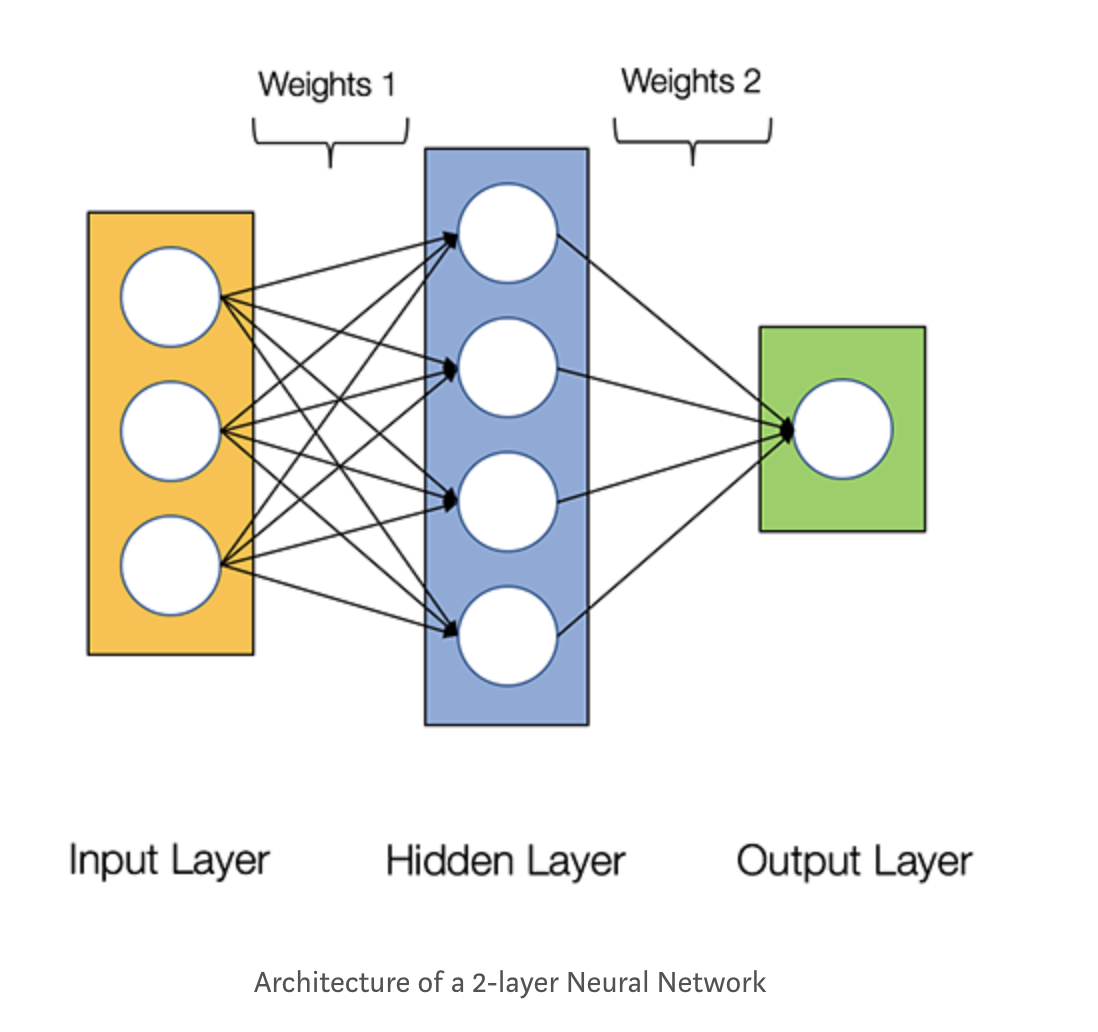

In [2]:
from IPython.display import Image
Image("images/NN.png", width=500)

Define the network

In [3]:
import numpy as np

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(y.shape)

The output ŷ of a simple 2-layer Neural Network is

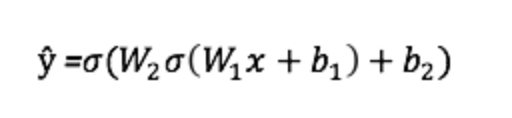

In [4]:
Image("images/eqtn1.png", width=300)

Each iteration of the training process consists of the following steps:

* Calculating the predicted output ŷ, known as feedforward
* Updating the weights and biases, known as backpropagation

The sequential graph below illustrates the process.

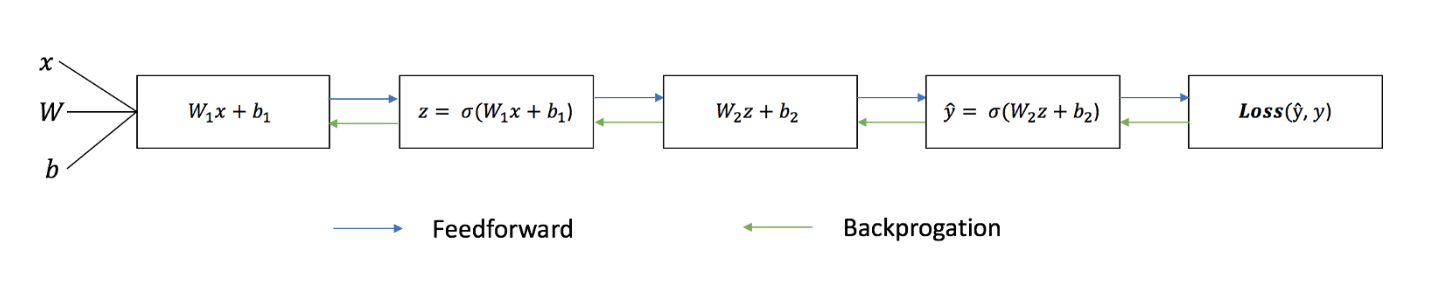

In [5]:
Image("images/training.png", width=1000)

### Feedforward
As we’ve seen in the sequential graph above, feedforward is just simple calculus and for a basic 2-layer neural network. Let’s add a feedforward function in our python code to do exactly that. Note that for simplicity, we have assumed the biases to be 0.

In [6]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

### Loss Function
There are many available loss functions, and the nature of our problem should dictate our choice of loss function. In this tutorial, we’ll use a simple sum-of-sqaures error as our loss function.

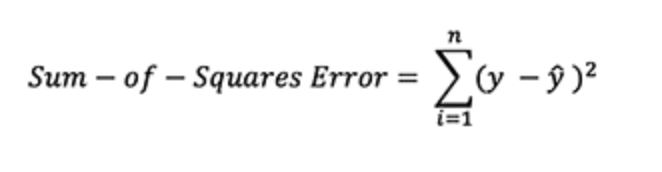

In [7]:
Image("images/loss.png", width=300)

Our goal in training is to find the best set of weights and biases that minimizes the loss function.

### Backpropagation
Now that we’ve measured the error of our prediction (loss), we need to find a way to propagate the error back, and to update our weights and biases.

In order to know the appropriate amount to adjust the weights and biases by, we need to know the derivative of the loss function with respect to the weights and biases.

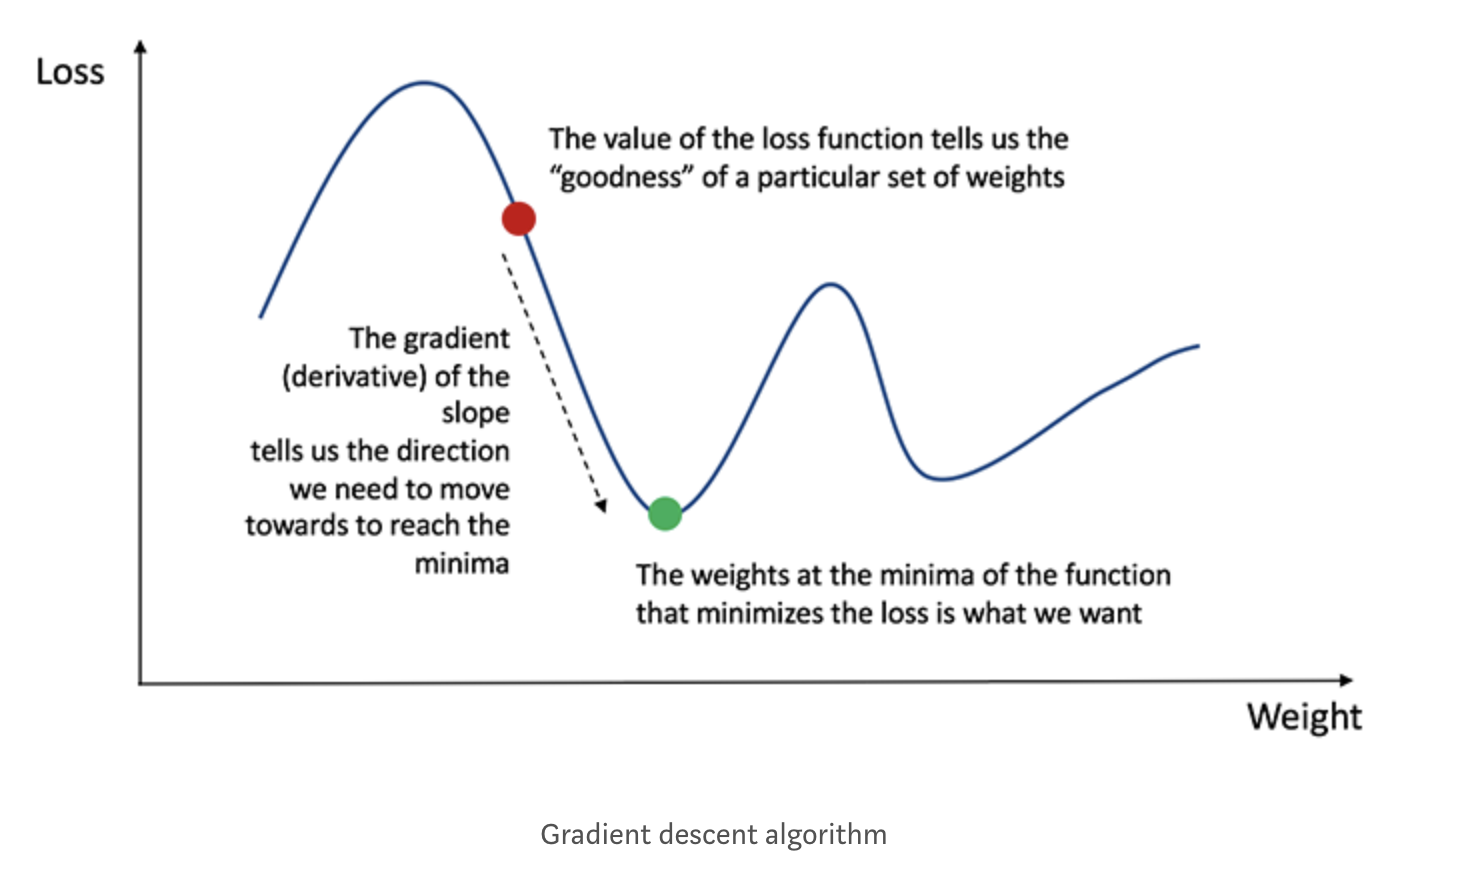

In [8]:
Image("images/gradient_algo.png", width=700)

If we have the derivative, we can simply update the weights and biases by increasing/reducing with it(refer to the diagram above). This is known as gradient descent.

However, we can’t directly calculate the derivative of the loss function with respect to the weights and biases because the equation of the loss function does not contain the weights and biases. Therefore, we need the chain rule to help us calculate it.

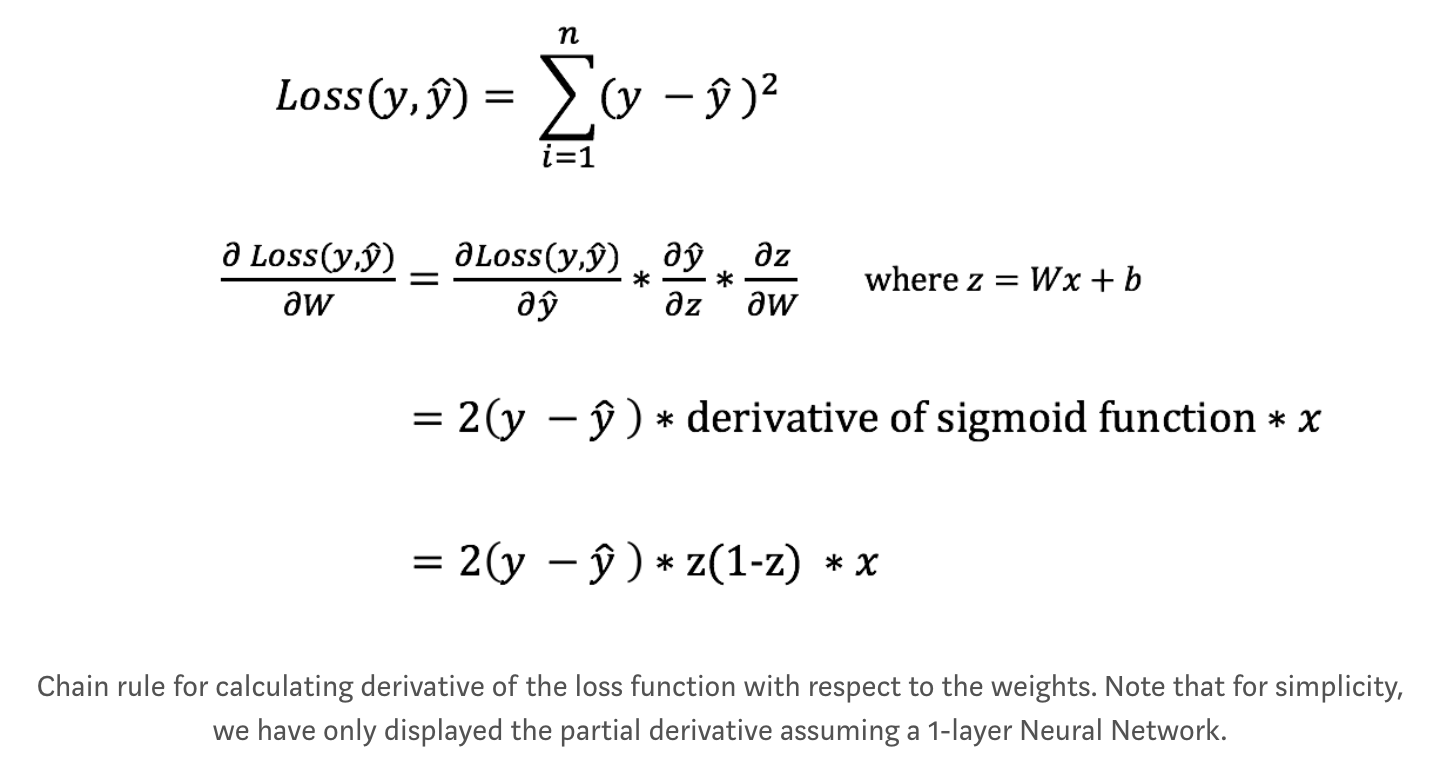

In [9]:
Image("images/calc.png", width=700)

Now that we have that, let’s add the backpropagation function into our python code.

In [10]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

def compute_loss(y_hat, y):
    return ((y_hat - y)**2).sum()

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2

In [11]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
y = np.array([[0],[1],[1],[0]])
nn = NeuralNetwork(X,y)

loss_values = []

for i in range(1500):
    nn.feedforward()
    nn.backprop()
    loss = compute_loss(nn.output, y)
    loss_values.append(loss)

print(nn.output)
print(f" final loss : {loss}")

[[0.00956709]
 [0.97212838]
 [0.97230853]
 [0.03205988]]
 final loss : 0.002663009667421757


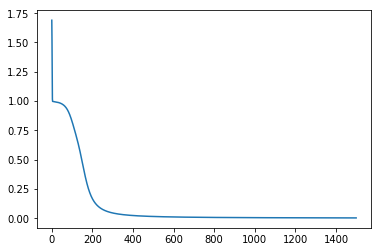

In [12]:
plt.plot(loss_values)